# Классификация отзывов по тональности : негативный, позитивный, нейтральный

Это набор данных sentiment140.
Он содержит 1 600 000 твитов, извлеченных с помощью twitter api. Твиты были аннотированы (0 = отрицательные, 2 = нейтральные, 4 = положительные), и их можно использовать для определения настроений.
Он содержит следующие 6 полей:

target: полярность твита (0 = отрицательная, 2 = нейтральная, 4 = положительная)

ids: Идентификатор твита ( 2087)

data: дата твита (Сб 16 мая 23:58:44 UTC 2009)

flag: Запрос (lyx). Если запроса нет, то это значение равно NO_QUERY.

user: пользователь, который написал твит (robotickilldozr)

text: текст твита (Lyx - это круто)

Официальная ссылка на набор данных с ресурсами о том, как он был сгенерирован, находится http://20http//help.sentiment140.com/for-students/

Официальный документ, подробно описывающий подход, находится http://bhttp//cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf


In [1]:
#pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from tqdm import tqdm
from gensim.models import FastText
import torchtext
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
column_names = ['target','id','date','flag','user','text']
twitter_data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names = column_names, encoding = 'ISO-8859-1')

In [4]:
twitter_data.shape

(1600000, 6)

In [5]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
twitter_data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

0 = отрицательный твит, 1 = положительный твит, 2 = нейтральный твит

In [8]:
twitter_data.replace({'target':{4:1}}, inplace=True)
twitter_data['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [9]:
twitter_data['stemmed_content'] = twitter_data['text']

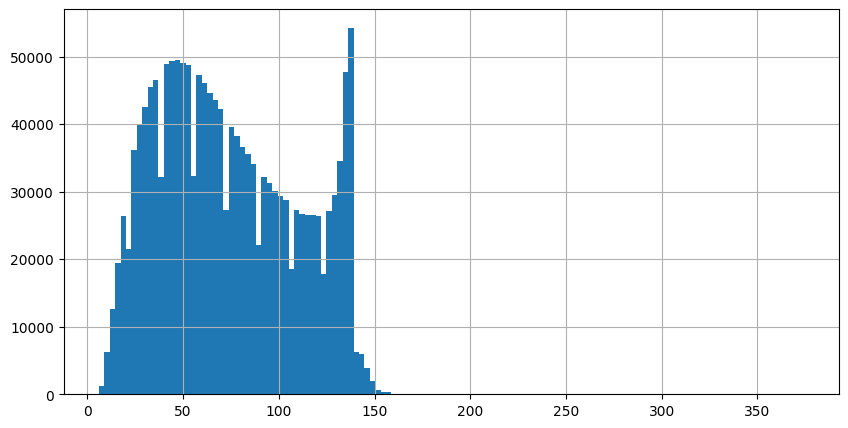

In [10]:
size = [len(tokens) for tokens in twitter_data['text']]

plt.figure(figsize=(10, 5))
plt.hist(size, bins=130)
plt.grid(True)
plt.show()

In [11]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1280000,) (320000,)


In [12]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [13]:
model_LogisticRegression = LogisticRegression(max_iter=1000)
model_LogisticRegression.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [14]:
X_train_prediction_lr = model_LogisticRegression.predict(X_train)
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction_lr)

In [ ]:
X_train_dense = X_train.toarray()
model_GaussianNB = GaussianNB()
result_bayes = model_GaussianNB.fit(X_train_dense, Y_train)

In [ ]:
X_train_prediction_nb = model_GaussianNB.predict(X_train)
training_data_accuracy_nb = accuracy_score(Y_train, X_train_prediction_nb)

In [ ]:
X_test_prediction_lr = model_LogisticRegression.predict(X_test)
test_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction_lr)

In [ ]:
X_test_prediction_nb = model_GaussianNB.predict(X_test)
test_data_accuracy_nb = accuracy_score(Y_test, X_test_prediction_nb)

In [ ]:
print('Evaluating the accuracy of training data using logistic regression: ' , training_data_accuracy_lr)
print('Evaluating the accuracy of Gaussian NB training data: ' , training_data_accuracy_nb)

In [ ]:
print('Evaluating the accuracy of test data using logistic regression: ' , test_data_accuracy_lr)
print('Evaluating the accuracy of Gaussian NB test data: ' , test_data_accuracy_nb)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, X_test_prediction_lr)).plot()
plt.show()

In [ ]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, X_test_prediction_nb)).plot()
plt.show()